# Reproducing de Boer's results (2000)

As a first step, we try to reproduce the results found by de Boer in his paper from 2000.
This paper will form the basis for our project thus reproducing its results is an important first step.
Thanks to de Boer being the teaching professor of the Evolution of Speech course @ VUB 2021-2022, we have access to the source code of this paper.

**Reference**: de Boer, B. (2000). Self-organization in vowel systems. *In Journal of Phonetics (Vol. 28, Issue 4, pp. 441–465)*. Elsevier BV. https://doi.org/10.1006/jpho.2000.0125

<hr>
<hr>

## Table of contents

- Student information
- Required imports
- Synthesizer equations
   - Validating synthesizer equations
- Synthesizer classes
   - Utterance and Phoneme class
   - Synthesizer class
   - Validating synthesizer equations in synthesizer class
- Determining distances between utterances
   - Validating bark conversion
   - Validating effective second formant conversion
   - Validating improved Bark conversion
   - Validating distance measures
- Implementing agents
   - Agent class

<hr>
<hr>

## Student information

- **Name**: Bontinck Lennert
- **Student ID**: 568702
- **Affiliation**: VUB - Master Computer Science: AI

<hr>
<hr>

## Required imports

Below we import the required things for this notebook.

In [1]:
# Used for random number generation
import random as rnd
import uuid

# Used for more complex mathematical operations
import math

# Used for plotting
import matplotlib.pyplot as plt

# Used for datatype representation
import numpy as np

# Easier iterations
import itertools

<hr>
<hr>

## Synthesizer equations

Bart de Boer's system consists of agents who can produce, perceive, and remember speech sounds in a human-like way.
To make this work the agents are equipped with an articulatory synthesizer.
This synthesizer takes as input the three major vowel parameters:

- tongue position: **p**
- tongue height: **h**
- lip rounding: **r**

The outputs of the synthesizer are the first four formant frequencies of the corresponding vowel.

- $F_1 (Hz)$
- $F_2 (Hz)$
- $F_3 (Hz)$
- $F_4 (Hz)$

Example input/outputs are given in table 1 of de Boer's paper (2000) and the Equations for $F_1$ to $F_4$ are given in table 1 of his paper (2000).
In the below code block we will first make the functions for each $F_x$ and check their output by comparing the values to the examples from the first table of de Boer's paper (2000).

In [2]:
# Defintions based on calculation functions from synthesise.cpp of de Boer's source code (2000)
def calculate_f1(p, h, r):
    f1 = ((-392+392*r)*pow(h, 2)+(596-668*r)*h-146+166*r)*pow(p, 2);
    f1 += ((348-348*r)*pow(h, 2)+(-494+606*r)*h+141-175*r)*p;
    f1 += ((340-72*r)*pow(h, 2)+(-796+108*r)*h+708-38*r);
    
    return f1;

def calculate_f2(p, h, r):
    f2 = ((-1200+1208*r)*pow(h, 2)+(1320-1328*r)*h+118-158*r)*pow(p, 2);
    f2 += ((1864-1488*r)*pow(h, 2)+(-2644+1510*r)*h-561+221*r)*p;
    f2 += ((-670+490*r)*pow(h, 2) + (1355-697*r)*h + 1517-117*r);
    
    return f2;

def calculate_f3(p, h, r):
    f3 = ((604-604*r)*pow(h, 2)+(1038-1178*r)*h+246+566*r)*pow(p, 2);
    f3 +=((-1150+1262*r)*pow(h, 2)+(-1443+1313*r)*h-317-483*r)*p;
    f3 +=((1130-836*r)*pow(h, 2)+(-315+44*r)*h+2427-127*r);
    
    return f3;

def calculate_f4(p, h, r):
    f4 = ((-1120+16*r)*pow(h, 2)+(1696-180*r)*h+500+522*r)*pow(p, 2);
    f4 +=((-140+240*r)*pow(h, 2)+(-578+214*r)*h-692-419*r)*p;
    f4 +=((1480-602*r)*pow(h, 2)+(-1220+289*r)*h+3678-178*r);
    
    return f4;



<hr>

### Validating synthesizer equations

We now check if the above functions return the correct formant values by testing all of the values given in table 2 of de Boer (2000).

In [3]:
argument_sets = [[0, 0, 0],
                 [0, 0, 1],
                 [0.5, 0, 0],
                 [0.5, 0, 1],
                 [1, 0, 0],
                 [1, 0, 1],
                 [0, 0.5, 0],
                 [0, 0.5, 1],
                 [0.5, 0.5, 0],
                 [0.5, 0.5, 1],
                 [1, 0.5, 0],
                 [1, 0.5, 1],
                 [0, 1, 0],
                 [0, 1, 1],
                 [0.5, 1, 0],
                 [0.5, 1, 1],
                 [1, 1, 0],
                 [1, 1, 1]];

values = [[708, 1517, 2427, 3678],
          [670, 1400, 2300, 3500], 
          [742, 1266, 2330, 3457],
          [658, 1220, 2103, 3200],
          [703, 1074, 2356, 3486],
          [656, 1020, 2312, 3411],
          [395, 2027, 2552, 3438],
          [393, 1684, 2238, 3254],
          [399, 1438, 2118, 3197],
          [400, 1267, 2005, 2996],
          [430, 1088, 2142, 3490],
          [399, 829, 2143, 3490],
          [252, 2202, 3242, 3938],
          [250, 1878, 2323, 3447],
          [264, 1591, 2259, 3502],
          [276, 1319, 2082, 3118],
          [305, 1099, 2220, 3604],
          [276, 740, 2177, 3506]];

for i in range(0, len(argument_sets)):
    print(f"F1 calculation for {argument_sets[i]} equals expected {values[i][0]}: {calculate_f1(argument_sets[i][0], argument_sets[i][1], argument_sets[i][2]) == values[i][0]} ({calculate_f1(argument_sets[i][0], argument_sets[i][1], argument_sets[i][2])})");
    print(f"F2 calculation for {argument_sets[i]} equals expected {values[i][1]}: {calculate_f2(argument_sets[i][0], argument_sets[i][1], argument_sets[i][2]) == values[i][1]} ({calculate_f2(argument_sets[i][0], argument_sets[i][1], argument_sets[i][2])})");
    print(f"F3 calculation for {argument_sets[i]} equals expected {values[i][2]}: {calculate_f3(argument_sets[i][0], argument_sets[i][1], argument_sets[i][2]) == values[i][2]} ({calculate_f3(argument_sets[i][0], argument_sets[i][1], argument_sets[i][2])})");
    print(f"F4 calculation for {argument_sets[i]} equals expected {values[i][3]}: {calculate_f4(argument_sets[i][0], argument_sets[i][1], argument_sets[i][2]) == values[i][3]} ({calculate_f4(argument_sets[i][0], argument_sets[i][1], argument_sets[i][2])})");
    print("---------------------------------------------------------------------");
    
    



F1 calculation for [0, 0, 0] equals expected 708: True (708)
F2 calculation for [0, 0, 0] equals expected 1517: True (1517)
F3 calculation for [0, 0, 0] equals expected 2427: True (2427)
F4 calculation for [0, 0, 0] equals expected 3678: True (3678)
---------------------------------------------------------------------
F1 calculation for [0, 0, 1] equals expected 670: True (670)
F2 calculation for [0, 0, 1] equals expected 1400: True (1400)
F3 calculation for [0, 0, 1] equals expected 2300: True (2300)
F4 calculation for [0, 0, 1] equals expected 3500: True (3500)
---------------------------------------------------------------------
F1 calculation for [0.5, 0, 0] equals expected 742: True (742.0)
F2 calculation for [0.5, 0, 0] equals expected 1266: True (1266.0)
F3 calculation for [0.5, 0, 0] equals expected 2330: True (2330.0)
F4 calculation for [0.5, 0, 0] equals expected 3457: True (3457.0)
---------------------------------------------------------------------
F1 calculation for [0.5,

We find that our functions perfectly match the expected output.

<hr>
<hr>

## Creating synthesizer related classes

From the above synthesizer equations, we can make the general needed synthesizer function.
This synthesizer function returns an **utterance**.
These functions will also allow for **agent noise** to be added so that the produced frequency lies between:

$F^{produced}_{i}(p, h, r) = F_{i}(p + \lambda, h + \lambda, r + \lambda)$

Likewise there is **ambient noise**, this will make the sound as follows:

$F^{sound}_{i} = F_{i} + \lambda$

With $\lambda$ the shifting value. This random is picked uniformly between:

$\frac{-\psi}{2} \leq \lambda \leq \frac{\psi}{2}$ 

We can see that $\psi$ is thus an important value denoting the maximum allowed agent and ambient noise.
We note that de Boer didn't include the upper bound due to the use of C++, we do include this upper bound.
This difference shouldn't be noticeable.
We also note that we found these 2 different versions of noise in the code of de Boer.

<hr>

### Utterance and Phoneme class
We start by making a class for **utterances**.
For now, this class just stores the different $F_x$ produced.

In [4]:
class Utterance:
    """This class represent an utterance consisting of the different formants F."""
    def __init__(self, f1, f2, f3, f4):
        self.f1 = f1;
        self.f2 = f2;
        self.f3 = f3;
        self.f4 = f4;
        
    def print(self):
        print(self.f1, " ", 
              self.f2, " ", 
              self.f3, " ", 
              self.f4);
        
    def string(self):
        return f"{self.f1} {self.f2} {self.f3} {self.f4}";

It is also handy to have a class that represents the used parameters for the synthesizer. We create the class **phoneme** for this.

In [5]:
class Phoneme:
    """This class represent a phoneme consisting of the different vowel parameters."""
    def __init__(self, p, h, r):
        # Values should be between 0 and 1
        self.p = max(min(p, 1), 0);
        self.h = max(min(h, 1), 0);
        self.r = max(min(r, 1), 0);

<hr>

### Synthesizer class
We also make a class for the **synthesizer**, that way we can store the variables for the **noise** etc.

In [6]:
class Synthesizer:
    """This is a class to represent utterances made by an agent."""
    def __init__(self, max_noise_agent, max_noise_ambient):
        self.max_noise_agent = max_noise_agent;
        self.max_noise_ambient = max_noise_ambient;
        
    def calculate_f1(self, phoneme: Phoneme):
        """Calculates the first formant."""
        f1 = ((-392+392*phoneme.r)*pow(phoneme.h, 2)+(596-668*phoneme.r)*phoneme.h-146+166*phoneme.r)*pow(phoneme.p, 2);
        f1 += ((348-348*phoneme.r)*pow(phoneme.h, 2)+(-494+606*phoneme.r)*phoneme.h+141-175*phoneme.r)*phoneme.p;
        f1 += ((340-72*phoneme.r)*pow(phoneme.h, 2)+(-796+108*phoneme.r)*phoneme.h+708-38*phoneme.r);
        
        return f1;


    def calculate_f2(self, phoneme: Phoneme):
        """Calculates the second formant."""
        f2 = ((-1200+1208*phoneme.r)*pow(phoneme.h, 2)+(1320-1328*phoneme.r)*phoneme.h+118-158*phoneme.r)*pow(phoneme.p, 2);
        f2 += ((1864-1488*phoneme.r)*pow(phoneme.h, 2)+(-2644+1510*phoneme.r)*phoneme.h-561+221*phoneme.r)*phoneme.p;
        f2 += ((-670+490*phoneme.r)*pow(phoneme.h, 2) + (1355-697*phoneme.r)*phoneme.h + 1517-117*phoneme.r);
        
        return f2;
    
    def calculate_f3(self, phoneme: Phoneme):
        """Calculates the third formant."""
        f3 = ((604-604*phoneme.r)*pow(phoneme.h, 2)+(1038-1178*phoneme.r)*phoneme.h+246+566*phoneme.r)*pow(phoneme.p, 2);
        f3 +=((-1150+1262*phoneme.r)*pow(phoneme.h, 2)+(-1443+1313*phoneme.r)*phoneme.h-317-483*phoneme.r)*phoneme.p;
        f3 +=((1130-836*phoneme.r)*pow(phoneme.h, 2)+(-315+44*phoneme.r)*phoneme.h+2427-127*phoneme.r);
        
        return f3;
    
    def calculate_f4(self, phoneme: Phoneme):
        """Calculates the fourth formant."""
        f4 = ((-1120+16*phoneme.r)*pow(phoneme.h, 2)+(1696-180*phoneme.r)*phoneme.h+500+522*phoneme.r)*pow(phoneme.p, 2);
        f4 +=((-140+240*phoneme.r)*pow(phoneme.h, 2)+(-578+214*phoneme.r)*phoneme.h-692-419*phoneme.r)*phoneme.p;
        f4 +=((1480-602*phoneme.r)*pow(phoneme.h, 2)+(-1220+289*phoneme.r)*phoneme.h+3678-178*phoneme.r);
        
        return f4;
    
    def synthesise(self, phoneme: Phoneme):
        """Synthesises a phoneme using the synthesiser's noise settings."""
        
        # Noise by the agent's production
        if(self.max_noise_agent > 0):
            new_p = phoneme.p + rnd.uniform(-self.max_noise_agent/2, self.max_noise_agent);
            new_h = phoneme.h + rnd.uniform(-self.max_noise_agent/2, self.max_noise_agent);
            new_r = phoneme.r + rnd.uniform(-self.max_noise_agent/2, self.max_noise_agent);
            
            # Make new phoneme to ensure right boundries etc
            phoneme = Phoneme(new_p, new_h, new_r)
            
        f1 = self.calculate_f1(phoneme)
        f2 = self.calculate_f2(phoneme)
        f3 = self.calculate_f3(phoneme)
        f4 = self.calculate_f4(phoneme)
        
        
        # Noise due to the communication channel
        if(self.max_noise_ambient > 0):
            f1 = f1 + rnd.uniform(-self.max_noise_ambient/2, self.max_noise_ambient);
            f2 = f2 + rnd.uniform(-self.max_noise_ambient/2, self.max_noise_ambient);
            f3 = f3 + rnd.uniform(-self.max_noise_ambient/2, self.max_noise_ambient);
            f4 = f4 + rnd.uniform(-self.max_noise_ambient/2, self.max_noise_ambient);
            
        # Make an utterance
        utterance = Utterance(f1, f2, f3, f4);
        
        return utterance; 
    

<hr>

### Validating synthesizer equations in synthesizer class

We test the created classes by performing the same test as before but with the use of these classes.

In [7]:
argument_sets = [[0, 0, 0],
                 [0, 0, 1],
                 [0.5, 0, 0],
                 [0.5, 0, 1],
                 [1, 0, 0],
                 [1, 0, 1],
                 [0, 0.5, 0],
                 [0, 0.5, 1],
                 [0.5, 0.5, 0],
                 [0.5, 0.5, 1],
                 [1, 0.5, 0],
                 [1, 0.5, 1],
                 [0, 1, 0],
                 [0, 1, 1],
                 [0.5, 1, 0],
                 [0.5, 1, 1],
                 [1, 1, 0],
                 [1, 1, 1]];

values = [[708, 1517, 2427, 3678],
          [670, 1400, 2300, 3500], 
          [742, 1266, 2330, 3457],
          [658, 1220, 2103, 3200],
          [703, 1074, 2356, 3486],
          [656, 1020, 2312, 3411],
          [395, 2027, 2552, 3438],
          [393, 1684, 2238, 3254],
          [399, 1438, 2118, 3197],
          [400, 1267, 2005, 2996],
          [430, 1088, 2142, 3490],
          [399, 829, 2143, 3490],
          [252, 2202, 3242, 3938],
          [250, 1878, 2323, 3447],
          [264, 1591, 2259, 3502],
          [276, 1319, 2082, 3118],
          [305, 1099, 2220, 3604],
          [276, 740, 2177, 3506]];

# Synthesizer without noise to be used
synthesizer = Synthesizer(0, 0);

for i in range(0, len(argument_sets)):
    
    phoneme = Phoneme(argument_sets[i][0], argument_sets[i][1], argument_sets[i][2]);
    
    utterance = synthesizer.synthesise(phoneme);
    
    
    print(f"F1 calculation for {argument_sets[i]} equals expected {values[i][0]}: {utterance.f1 == values[i][0]} ({utterance.f1})");
    print(f"F2 calculation for {argument_sets[i]} equals expected {values[i][1]}: {utterance.f2 == values[i][1]} ({utterance.f2})");
    print(f"F3 calculation for {argument_sets[i]} equals expected {values[i][2]}: {utterance.f3 == values[i][2]} ({utterance.f3})");
    print(f"F4 calculation for {argument_sets[i]} equals expected {values[i][3]}: {utterance.f4 == values[i][3]} ({utterance.f4})");
    print("---------------------------------------------------------------------");
    
    



F1 calculation for [0, 0, 0] equals expected 708: True (708)
F2 calculation for [0, 0, 0] equals expected 1517: True (1517)
F3 calculation for [0, 0, 0] equals expected 2427: True (2427)
F4 calculation for [0, 0, 0] equals expected 3678: True (3678)
---------------------------------------------------------------------
F1 calculation for [0, 0, 1] equals expected 670: True (670)
F2 calculation for [0, 0, 1] equals expected 1400: True (1400)
F3 calculation for [0, 0, 1] equals expected 2300: True (2300)
F4 calculation for [0, 0, 1] equals expected 3500: True (3500)
---------------------------------------------------------------------
F1 calculation for [0.5, 0, 0] equals expected 742: True (742.0)
F2 calculation for [0.5, 0, 0] equals expected 1266: True (1266.0)
F3 calculation for [0.5, 0, 0] equals expected 2330: True (2330.0)
F4 calculation for [0.5, 0, 0] equals expected 3457: True (3457.0)
---------------------------------------------------------------------
F1 calculation for [0.5,

Again, we find the results are as expected indicating our code is working as expected.

<hr>
<hr>

## Determining distances between utterances

Next, we recreate the functions and classes needed for calculating distances between utterances.
Note: The conversion is not perfect acording to de Boer as it is interpolated (2000).
Because of this we provide an alternative.

In [8]:
class BarkOperator:
    """This is class is used to perform Bark operations such as distance measures.
    Paper used critical_distance 3.5 and second_formant_weight (lambda) as 0.3."""
    def __init__(self, critical_distance, second_formant_weight, alternative_bark_conversion = False):
        self.critical_distance = critical_distance;
        self.second_formant_weight = second_formant_weight;
        self.better_bark_conversion = alternative_bark_conversion;

    def hertz_to_bark(self, hertz):
        """Converts hertz to bark."""
        if(self.better_bark_conversion):
            return self.hertz_to_bark_alternative(hertz);
        
        if(hertz > 271.32):
            return (math.log(hertz/271.32) / 0.1719) + 2;
        else:
            return (hertz-51)/110;

    def bark_to_hertz(self, bark):
        """Converts bark to hertz."""
        if(self.better_bark_conversion):
            return self.bark_to_hertz_alternative(bark);
        
        if(bark > 2):
            return 271.32 * math.exp( (bark-2)*0.1719 );
        else:
            return (bark*110) + 51;

    def hertz_to_bark_alternative(self, hertz):
        """Converts hertz to bark on an alternative way as used by matlab."""
        # https://nl.mathworks.com/help/audio/ref/hz2bark.html
        bark = (26.81*hertz)/(1960 + hertz) - 0.53
        
        if (bark < 2):
            bark = bark + (0.15 * (2 - bark));
            
        if (bark > 20.1):
            bark = bark + (0.22 * (bark - 20.1));
            
        return bark;

    def bark_to_hertz_alternative(self, bark):
        """Converts hertz to bark on an alternative way as used by matlab."""
        # From https://nl.mathworks.com/help/audio/ref/bark2hz.html
        if (bark < 2):
            bark = (bark - 0.3)/0.85;
            
        if (bark > 20.1):
            bark = (bark + 4.422)/1.22;
            
        hertz = 1960 * ((bark + 0.53) / (26.28 - bark));
        
        return hertz;
        
    def bark_f1(self, utterance: Utterance):
        """Converts an utterance to the first formant bark."""
        return self.hertz_to_bark(utterance.f1);
    
    def weighted_f2(self, f2_bark, f3_bark, f4_bark):
        """Calculates the effective seconf formant based on the higher frequency barks."""
        if ( f3_bark - f2_bark > self.critical_distance ):
            return ( f2_bark );
        
        # These weights are not optimal according to de Boer
        weight1 = (self.critical_distance - (f3_bark - f2_bark)) / self.critical_distance;
        weight2 = ((f4_bark - f3_bark) - (f3_bark - f2_bark)) / (f4_bark - f2_bark);
        
        if (weight2 < 0):
                weight2 = -weight2;
                
        if ((f4_bark - f2_bark) > self.critical_distance):
            return (((2 - weight1) * f2_bark) + (weight1 * f3_bark)) / 2;
        
        if ((f3_bark - f2_bark) < (f4_bark - f3_bark)):
            return (((weight2 * f2_bark) + ((2 - weight2) * f3_bark)) / 2) - 1;
        
        # Default -> there was a + between 2 and weight2 in the paper but not in the code
        return ((((2 - weight2) * f3_bark) + (weight2 * f4_bark)) / 2) - 1;
    
    def bark_f2(self, utterance: Utterance):
        """Converts and utterance to the effective second formant bark."""
        f2_bark = self.hertz_to_bark(utterance.f2)
        f3_bark = self.hertz_to_bark(utterance.f3)
        f4_bark = self.hertz_to_bark(utterance.f4)
        
        return self.weighted_f2(f2_bark, f3_bark, f4_bark);
        
    def distance_between_utterances(self, utterance_1: Utterance, utterance_2: Utterance):
        """Calculates the distance between 2 utterances."""
        f1_bark_utt1 = self.bark_f1( utterance_1 );
        f1_bark_utt2 = self.bark_f1( utterance_2 );
        
        f2_bark_utt1 = self.bark_f2( utterance_1 );
        f2_bark_utt2 = self.bark_f2( utterance_2 );
        
        f1_difference = math.pow(f1_bark_utt1 - f1_bark_utt2, 2);
        f2_difference = math.pow(f2_bark_utt1 - f2_bark_utt2, 2);
        
        return math.sqrt(f1_difference + (self.second_formant_weight * f2_difference));
    

<hr>

### Validating bark conversion

We test the above bark operator in the below code blocks.
We start by testing the conversions between hertz and bark.

In [9]:
# Bark operator configured as used in paper
bark_operator = BarkOperator(3.5, 0.3);

test_values = [300, 600, 900, 1200, 2000];

for test_value in test_values:
    test_freq = test_value;
    test_bark = bark_operator.hertz_to_bark(test_freq);
    print(f"{test_freq} Hz is {test_bark} bark.");
    
    test_freq_found = bark_operator.bark_to_hertz(test_bark);
    print(f"{test_bark} bark is {test_freq_found} Hz.");
    
    print("---------------------------------------")

300 Hz is 2.5845464722415485 bark.
2.5845464722415485 bark is 300.0 Hz.
---------------------------------------
600 Hz is 6.616816283526862 bark.
6.616816283526862 bark is 600.0 Hz.
---------------------------------------
900 Hz is 8.975542915918744 bark.
8.975542915918744 bark is 900.0000000000001 Hz.
---------------------------------------
1200 Hz is 10.649086094812175 bark.
10.649086094812175 bark is 1200.0 Hz.
---------------------------------------
2000 Hz is 13.620730212124512 bark.
13.620730212124512 bark is 2000.0 Hz.
---------------------------------------


<hr>

### Validating effective second formant conversion

We now test the effective second formant conversion.

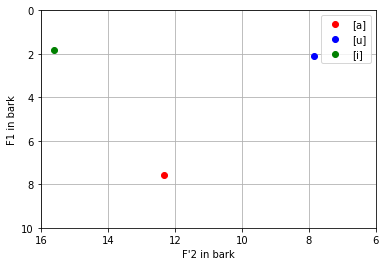

In [10]:
# Synthesizer without noise to be used
synthesizer = Synthesizer(0, 0);

# Bark operator configured as used in paper
bark_operator = BarkOperator(3.5, 0.3);

# Make utterances
phoneme_a = Phoneme(0, 0, 0);
utterance_a = synthesizer.synthesise(phoneme_a);
f1_a = bark_operator.bark_f1(utterance_a);
f2_a = bark_operator.bark_f2(utterance_a);

phoneme_u = Phoneme(1, 1, 1);
utterance_u = synthesizer.synthesise(phoneme_u);
f1_u = bark_operator.bark_f1(utterance_u);
f2_u = bark_operator.bark_f2(utterance_u);

phoneme_i = Phoneme(0, 1, 0);
utterance_i = synthesizer.synthesise(phoneme_i);
f1_i = bark_operator.bark_f1(utterance_i);
f2_i = bark_operator.bark_f2(utterance_i);

# Plot results
plt.plot(f2_a, f1_a, 'ro');
plt.plot(f2_u, f1_u, 'bo');
plt.plot(f2_i, f1_i, 'go');

plt.ylim(0, 10);
plt.xlim(6, 16);

plt.xlabel("F'2 in bark");
plt.ylabel("F1 in bark");
plt.gca().invert_xaxis();
plt.gca().invert_yaxis();
plt.grid();

plt.legend(["[a]", "[u]", "[i]"]);

These findings are not identical but comparable to figures such as the one shown [here](https://upload.wikimedia.org/wikipedia/commons/6/6f/F1_and_F2_formant_chart_with_Bark_scale_%282%29.gif).

<hr>

### Validating improved Bark conversion

We now test if our improved bark conversion yields differing results then the one proposed by de Boer.

300 Hz is 3.0288495575221237 bark.
3.0288495575221237 bark is 299.99999999999994 Hz.
---------------------------------------
600 Hz is 5.753593749999999 bark.
5.753593749999999 bark is 599.9999999999999 Hz.
---------------------------------------
900 Hz is 7.906713286713287 bark.
7.906713286713287 bark is 900.0 Hz.
---------------------------------------
1200 Hz is 9.651012658227849 bark.
9.651012658227849 bark is 1200.0 Hz.
---------------------------------------
2000 Hz is 13.01040404040404 bark.
13.01040404040404 bark is 1999.9999999999995 Hz.
---------------------------------------


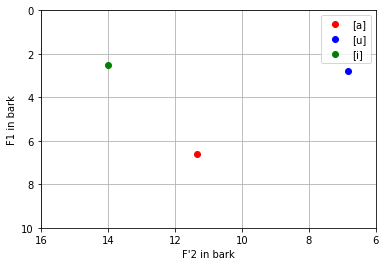

In [11]:
# Synthesizer without noise to be used
synthesizer = Synthesizer(0, 0);

# Bark operator configured as used in paper
bark_operator = BarkOperator(3.5, 0.3, True);

# Test conversions
test_values = [300, 600, 900, 1200, 2000];

for test_value in test_values:
    test_freq = test_value;
    test_bark = bark_operator.hertz_to_bark(test_freq);
    print(f"{test_freq} Hz is {test_bark} bark.");
    
    test_freq_found = bark_operator.bark_to_hertz(test_bark);
    print(f"{test_bark} bark is {test_freq_found} Hz.");
    
    print("---------------------------------------")

# Make utterances
phoneme_a = Phoneme(0, 0, 0);
utterance_a = synthesizer.synthesise(phoneme_a);
f1_a = bark_operator.bark_f1(utterance_a);
f2_a = bark_operator.bark_f2(utterance_a);

phoneme_u = Phoneme(1, 1, 1);
utterance_u = synthesizer.synthesise(phoneme_u);
f1_u = bark_operator.bark_f1(utterance_u);
f2_u = bark_operator.bark_f2(utterance_u);

phoneme_i = Phoneme(0, 1, 0);
utterance_i = synthesizer.synthesise(phoneme_i);
f1_i = bark_operator.bark_f1(utterance_i);
f2_i = bark_operator.bark_f2(utterance_i);

# Plot results
plt.plot(f2_a, f1_a, 'ro');
plt.plot(f2_u, f1_u, 'bo');
plt.plot(f2_i, f1_i, 'go');

plt.ylim(0, 10);
plt.xlim(6, 16);

plt.xlabel("F'2 in bark");
plt.ylabel("F1 in bark");
plt.gca().invert_xaxis();
plt.gca().invert_yaxis();
plt.grid();

plt.legend(["[a]", "[u]", "[i]"]);

We see that the alternative bark conversion does indeed influence the results.
However, both variants seem suiting enough for the project. 
Our findings now also correspond more to these found [here](https://upload.wikimedia.org/wikipedia/commons/6/6f/F1_and_F2_formant_chart_with_Bark_scale_%282%29.gif).
After discussion with de Boer, we know that the synthesizer is based on a female voice, explaining the higher frequency formants compared to online variants which often use male voices for calibration.

<hr>

### Validating distance measures

We now test the distance measure.

In [12]:
# Synthesizer without noise to be used
synthesizer = Synthesizer(0, 0);

# Bark operator configured as used in paper
bark_operator = BarkOperator(3.5, 0.3);

# Make utterances
phoneme_a = Phoneme(0, 0, 0);
utterance_a = synthesizer.synthesise(phoneme_a);

phoneme_u = Phoneme(1, 1, 1);
utterance_u = synthesizer.synthesise(phoneme_u);

phoneme_i = Phoneme(0, 1, 0);
utterance_i = synthesizer.synthesise(phoneme_i);

# Show some distances
print(f"Distance between [a] and [a]: {bark_operator.distance_between_utterances(utterance_a, utterance_a)}");
print();
print(f"Distance between [a] and [u]: {bark_operator.distance_between_utterances(utterance_a, utterance_u)}");
print(f"Distance between [u] and [a]: {bark_operator.distance_between_utterances(utterance_u, utterance_a)}");
print();
print(f"Distance between [a] and [i]: {bark_operator.distance_between_utterances(utterance_a, utterance_i)}");
print(f"Distance between [i] and [a]: {bark_operator.distance_between_utterances(utterance_i, utterance_a)}");
print();
print(f"Distance between [u] and [i]: {bark_operator.distance_between_utterances(utterance_u, utterance_i)}");
print(f"Distance between [i] and [u]: {bark_operator.distance_between_utterances(utterance_i, utterance_u)}");

Distance between [a] and [a]: 0.0

Distance between [a] and [u]: 6.00337920927803
Distance between [u] and [a]: 6.00337920927803

Distance between [a] and [i]: 6.03065439222427
Distance between [i] and [a]: 6.03065439222427

Distance between [u] and [i]: 4.270566850184127
Distance between [i] and [u]: 4.270566850184127


The results we find seem reasonable. We Think this means our bark operations are correct.

<hr>
<hr>

## Implementing agents

The most important class of de Boer is the agent, as it ties together all elements and the games occur between agents.
The agents will be implemented here.

<hr>

### Sounds for an agents repetoire

This class will be used to keep track of the agents known sounds.

In [86]:
class Sound:
    """This is a class used to represent known sounds in an agents repetoire."""
    def __init__(self, phoneme: Phoneme):
        self.phoneme = phoneme;
        self.utterance = Synthesizer(0, 0).synthesise(phoneme);
        self.usage_count = 0;
        self.success_count = 0;
        
    def was_used(self):
        self.usage_count += 1;
        
    def was_success(self):
        self.success_count += 1;
        
    def success_ratio(self):
        if self.usage_count == 0:
            # Not used, return perfect success
            return 1;
        else:
            return self.success_count/self.usage_count;
        
    def improve(self, improved_sound: Sound):
        self.phoneme = improved_sound.phoneme;
        self.utterance = improved_sound.utterance;
        
    def merge(self, improved_sound: Sound):
        self.usage_count += improved_sound.usage_count
        self.success_count += improved_sound.success_count

<hr>

### Agent class

An agent is the most important entity of the experiments by de Boer.
It contains some parameters that are not clearly specified by the original paper and might require finetuning to gather correct results.

In [92]:
class Agent:
    """This is a class used to represent agents in the experiment.
    The known_phonemes are used to represent the vowels known by the agent."""
    def __init__(self, synthesizer: Synthesizer, bark_operator: BarkOperator, logger = False):
        # --------- Variables to be set according to init
        # Agents knows no phonemes at start
        self.known_sounds = [];
        # The synthesizer to be used by the agent
        self.synthesizer = synthesizer;
        # The bark operator to bes used by the agent
        self.bark_operator = bark_operator
        # Log progress
        self.logger = logger;
        # --------- Variables to be set according to experiment
        # Step size for phoneme parameter change
        self.phoneme_step_size = 0.05;
        # Repititions allowed to find similar sound
        self.max_similar_sound_loops = 3;
        # Unique name for agent
        self.name = uuid.uuid4().hex[:10].upper();
        # Keep track of last sounds
        self.last_spoken_sound = None;
        self.last_heard_utterance = None;
        # Threshold for sound success when evaluating failed game
        self.sound_threshold_game = 0.5;
        # Threshold for sound success when evaluating agent himself
        self.sound_threshold_agent = 0.7;
        # Count to keep track of agents games played
        self.games_count = 0;
        # Probability to perform cleanup
        self.cleanup_prob = 0.05;
        # Probability to add new random sound
        self.new_sound_prob = 0.01;
        # Distance for points that are "too close"
        self.merge_distance = 0.3
        
        
        
    def prepare_for_new_game(self):
        """Performs actions to be taken on end of game, preparing for next game."""
        # Reset last spoken and heard parameters
        self.last_spoken_sound = None;
        self.last_heard_utterance = None;
        
        # Register played game
        self.games_count += 1;
        
        # Periodically cleanup sounds
        if (rnd.uniform(0, 1) < self.cleanup_prob):
            self.cleanup();
        
        # Periodically add new sounds
        if (rnd.uniform(0, 1) < self.new_sound_prob):
            self.add_random_known_sound() 
        
    def cleanup(self):
        # Keep track of sounds needing removing
        sounds_to_remove = [];
        
        # If sound is used and below threshold - remove 
        for sound in self.known_sounds:
            if (sound.usage_count > 5 and sound.success_ratio() < self.sound_threshold_agent):
                sounds_to_remove.append(sound);
                if self.logger:
                    print(self.name + ": Removed sound during cleanup.");
                    
        # If sounds are close together - merge them by keeping "best"
        for eval_index in range(len(self.known_sounds)):
             evaluation_sound = self.known_sounds[eval_index];
             if evaluation_sound in sounds_to_remove:
                 # Don't consider this sound
                 continue;
             
             for potential_merge_index in range(eval_index, len(self.known_sounds)):
                 potential_merge_sound = self.known_sounds[potential_merge_index];
                 if potential_merge_sound in sounds_to_remove:
                     # Don't consider this sound
                     continue;
                 
                 # If distance is too close they can be confused
                 if (self.bark_operator.distance_between_utterances(evaluation_sound.utterance, potential_merge_sound.utterance) < self.merge_distance):
                     # Determine worst and best sound
                     worst_sound = evaluation_sound if evaluation_sound.success_ratio() < potential_merge_sound.success_ratio() else potential_merge_sound
                     best_sound = evaluation_sound if evaluation_sound.success_ratio() > potential_merge_sound.success_ratio() else potential_merge_sound
                     
                     # Remove worst sound
                     sounds_to_remove.append(worst_sound);
                     
                     # Merge worst sound to best sound
                     best_sound.merge(worst_sound);
        
        # Do the remove at the end to ensure no buggy loops, ensure no dupes in list
        sounds_to_remove = list(set(sounds_to_remove))
        for sound in sounds_to_remove:
            # Keep unique values
            self.known_sounds.remove(sound);
        
    def add_random_known_sound(self):
        """Adds random sound to agents reptoire."""
        # Create random phoneme
        new_p = rnd.uniform(0, 1);
        new_h = rnd.uniform(0, 1);
        new_r = rnd.uniform(0, 1);
        phoneme = Phoneme(new_p, new_h, new_r);
        
        # Add phoneme to known sounds
        sound = Sound(phoneme);
        self.known_sounds.append(sound);
        
        if self.logger:
            print(self.name + ": Added a random sound to my repetoire.");
        
    def improve_sound(self, original_sound: Sound, goal_utterance: Utterance):
        """Returns improved original sound which is more like the goal sound.
        Considers all permutations of phoneme using phoneme_step_size"""
        # Determine all possible variations of parameter modifications
        variations = list(itertools.combinations_with_replacement([-self.phoneme_step_size,
                                                                   0,
                                                                   self.phoneme_step_size],
                                                                  3));
        
        # Init vars
        best_distance = float('inf');
        best_sound = original_sound;
        for variation in variations:
            # Create variation sound
            new_p = original_sound.phoneme.p + variation[0];
            new_h = original_sound.phoneme.h + variation[1];
            new_r = original_sound.phoneme.r + variation[2];
            new_phoneme = Phoneme(new_p, new_h, new_r);
            new_sound = Sound(new_phoneme);
            
            # Test variation
            new_distance = self.bark_operator.distance_between_utterances(goal_utterance, new_sound.utterance);
            if (new_distance < best_distance):
                best_distance = new_distance;
                best_sound = new_sound;
            
        # Return best found variation
        return best_sound;
        
        
    def add_similar_sound(self, goal_utterance: Utterance):
        """Adds sound to agents repetoire that sounds similar to the given utterance."""
        # Start from a 'corner' as per de Boer's code
        best_distance = float('inf');
        best_sound = None;
        for i in range(8):
            new_p = (i % 2)*0.5+0.25;
            new_h = ((i /2) % 2)*0.5+0.25;
            new_r = (i / 4)*0.5+0.25;
            new_phoneme = Phoneme(new_p, new_h, new_r);
            new_sound = Sound(new_phoneme);
            
            # Test variation
            new_distance = self.bark_operator.distance_between_utterances(goal_utterance, new_sound.utterance);
            if (new_distance < best_distance):
                best_distance = new_distance;
                best_sound = new_sound;
        
        # Improve sound for specified amount of times
        for i in range(self.max_similar_sound_loops):
            best_sound = self.improve_sound(best_sound, goal_utterance);
            
        if self.logger:
            print(self.name + ": Added a similar sound to the one I heard to my repetoire.");
            
        # Add the best sound
        self.known_sounds.append(best_sound);
        

    def find_similar_sound(self, goal_utterance: Utterance):
        """Returns sound in repetoire closes to given utterance."""
        best_distance = float('inf');
        best_sound = None;
        
        for sound in self.known_sounds:
            new_distance = self.bark_operator.distance_between_utterances(goal_utterance, sound.utterance);
            if (new_distance < best_distance):
                best_distance = new_distance;
                best_sound = sound;
                
        return best_sound;
        
    def say_something(self):
        """Produces a random utterance and stores it has said it.
        Adds a phoneme to the agents repetoire if needed. """
        # Agent knows no sounds, add one
        if not self.known_sounds:
            self.add_random_known_sound();
            
        # Chose a random known phoneme
        self.last_spoken_sound = rnd.randrange(len(self.known_sounds));
        sound = self.known_sounds[self.last_spoken_sound];
        
        # Register use
        sound.was_used();
        
        # Produce an utterance from the chosen sound
        utterance = self.synthesizer.synthesise(sound.phoneme);
        
        if self.logger:
            print(self.name + ": saying " + utterance.string());
        
        # Return the utterance
        return utterance;

    def imitate_sound(self, heard_utterance: Utterance):
        """Produces an utterance based on the utterance it just heard."""
        if self.logger:
            print(self.name + ": heard " + heard_utterance.string());
            
        # Safe just heard sound
        self.last_heard_utterance = heard_utterance;
            
        # Agent knows no sounds, add one
        if not self.known_sounds:
            self.add_similar_sound(heard_utterance);
            
        # Find closest sound
        closest_sound = self.find_similar_sound(heard_utterance);
        
        # Register use
        self.last_spoken_sound = self.known_sounds.index(closest_sound);
        closest_sound.was_used();
        
        if self.logger:
            print(self.name + ": imitated " + closest_sound.utterance.string());
        
        
        # Return the utterance
        return closest_sound.utterance;
    
    def validate_imitation(self, heard_utterance: Utterance):
        """Returns true if imitation is correct according to agent."""
        if self.logger:
            print(self.name + ": heard " + heard_utterance.string());
            
        # Find closest sound
        closest_sound = self.find_similar_sound(heard_utterance);
        
        # Closest sound is sound
        good_imitation = closest_sound == self.known_sounds[self.last_spoken_sound];
        
        if good_imitation:
            self.known_sounds[self.last_spoken_sound].was_success();
        
        if self.logger:
            if good_imitation:
                print(self.name + ": confirmed match with " + closest_sound.utterance.string());
            else:
                print(self.name + ": rejected match with  " + closest_sound.utterance.string());
                
        # End of current game
        self.prepare_for_new_game();
        
        return good_imitation;
    
    def process_non_verbal_imitation_confirmation(self, was_success):
        if was_success:
            # Save success
            self.known_sounds[self.last_spoken_sound].was_success();
            # "Shift closer"
            improved_sound = self.improve_sound(self.known_sounds[self.last_spoken_sound], self.last_heard_utterance);
            self.known_sounds[self.last_spoken_sound].improve(improved_sound);
        else:
            if self.known_sounds[self.last_spoken_sound].success_ratio() < 0.5:
                # Probably bad sound - "Shift closer"
                improved_sound = self.improve_sound(self.known_sounds[self.last_spoken_sound], self.last_heard_utterance);
                self.known_sounds[self.last_spoken_sound].improve(improved_sound);
            else:
                # Probably good sound - add new sound to repetoire
                self.add_similar_sound(self.last_heard_utterance);
            
            
        if self.logger:
            if was_success:
                print(self.name + ": had a confirmed match, changed my sound to match closer.");
                
        # End of current game
        self.prepare_for_new_game();

<hr>

### Validate init of speaking agent and imitating agent

In [93]:
# Create a synthesize to be used
synthesizer = Synthesizer(max_noise_agent=0, max_noise_ambient=0.1);
# Bark operator configured as used in paper
bark_operator = BarkOperator(3.5, 0.3);

agent1 = Agent(synthesizer, bark_operator, logger=True);
agent2 = Agent(synthesizer, bark_operator, logger=True);

# Game 1
start_utterance = agent1.say_something();
imitated_utterance = agent2.imitate_sound(start_utterance);
validation = agent1.validate_imitation(imitated_utterance);
agent2.process_non_verbal_imitation_confirmation(validation);

print()
print()

# Game 2
start_utterance = agent2.say_something();
imitated_utterance = agent1.imitate_sound(start_utterance);
validation = agent2.validate_imitation(imitated_utterance);
agent1.process_non_verbal_imitation_confirmation(validation);

3245973F3D: Added a random sound to my repetoire.
3245973F3D: saying 340.9978203483367 1409.5712997047958 2086.560678529678 3222.5051032111446
6A1AC88057: heard 340.9978203483367 1409.5712997047958 2086.560678529678 3222.5051032111446
6A1AC88057: Added a similar sound to the one I heard to my repetoire.
6A1AC88057: imitated 341.247 1612.97305 2138.7105 3104.6740999999997
3245973F3D: heard 341.247 1612.97305 2138.7105 3104.6740999999997
3245973F3D: confirmed match with 340.97036919241174 1409.4748479211044 2086.4944328050437 3222.462087611614
6A1AC88057: had a confirmed match, changed my sound to match closer.


6A1AC88057: saying 341.346595301833 1612.959488658926 2138.720250761973 3104.717790683618
3245973F3D: heard 341.346595301833 1612.959488658926 2138.720250761973 3104.717790683618
3245973F3D: imitated 340.97036919241174 1409.4748479211044 2086.4944328050437 3222.462087611614
6A1AC88057: heard 340.97036919241174 1409.4748479211044 2086.4944328050437 3222.462087611614
6A1AC88057: c

In [95]:
for i in range(2000):
    print();
    print();
    
    # Game 1
    start_utterance = agent1.say_something();
    imitated_utterance = agent2.imitate_sound(start_utterance);
    validation = agent1.validate_imitation(imitated_utterance);
    agent2.process_non_verbal_imitation_confirmation(validation);
    
    print();
    print();
    
    # Game 2
    start_utterance = agent2.say_something();
    imitated_utterance = agent1.imitate_sound(start_utterance);
    validation = agent2.validate_imitation(imitated_utterance);
    agent1.process_non_verbal_imitation_confirmation(validation);



3245973F3D: saying 321.7270363690611 1542.7711418667843 2153.444778105135 3175.0857545143317
6A1AC88057: heard 321.7270363690611 1542.7711418667843 2153.444778105135 3175.0857545143317
6A1AC88057: imitated 664.6844125 1514.9656375 2358.6383312499997 3540.05315
3245973F3D: heard 664.6844125 1514.9656375 2358.6383312499997 3540.05315
3245973F3D: rejected match with  671.9 1405.85 2306.35 3508.9
6A1AC88057: Added a similar sound to the one I heard to my repetoire.


6A1AC88057: saying 315.1058763826347 1544.9698909988351 2097.7838246821807 3059.8323599194196
3245973F3D: heard 315.1058763826347 1544.9698909988351 2097.7838246821807 3059.8323599194196
3245973F3D: imitated 321.6992058521306 1542.7172893085808 2153.365003625749 3175.0593556166596
6A1AC88057: heard 321.6992058521306 1542.7172893085808 2153.365003625749 3175.0593556166596
6A1AC88057: confirmed match with 315.125 1544.90625 2097.6875 3059.8125
3245973F3D: had a confirmed match, changed my sound to match closer.


3245973F3D: s

In [96]:
# TODO: Check if working ok and do further from pdf as said below
# TODO: further All the actions in the imitation game make use of only local
